# Examen del 2do Parcial

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


In [3]:
import mne
import numpy as np
import pandas as pd
from scipy.signal import coherence, hilbert
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.io
#
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import colormaps
from networkx.algorithms.community import greedy_modularity_communities, modularity

# coactivation_matri.mat

In [4]:
# Definir path
coacti_matrix_path = r"C:\Users\Luz María\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\BCT\Coactivation_matrix.mat"

In [5]:
# Leer el archivo Coactivation_matrix.mat
coactivation_dict= scipy.io.loadmat(coacti_matrix_path)
coactivation_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]], shape=(638, 638)),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.

In [6]:
# Coeficiente de mundo pequeño
matriz= coactivation_dict['Coactivation_matrix']
G_coact = nx.from_numpy_array(matriz)
G_coact = G_coact.to_undirected()
# Calcular coeficiente de clustering medio (C)
C = nx.average_clustering(G_coact, weight='weight')
L = nx.average_shortest_path_length(G_coact, weight='weight')
# Crear red aleatoria equivalente (mismo número de nodos y densidad)
num_nodos = G_coact.number_of_nodes()
num_aristas = G_coact.number_of_edges()
p = (2 * num_aristas) / (num_nodos * (num_nodos - 1))  # probabilidad equivalente
G_rand = nx.gnp_random_graph(num_nodos, p)
C_rand = nx.average_clustering(G_rand)
L_rand = nx.average_shortest_path_length(G_rand)
# Coeficiente de mundo pequeño (σ)
sigma = (C / C_rand) / (L / L_rand)
print(f"C = {C:.3f}, L = {L:.3f}")
print(f"C_rand = {C_rand:.3f}, L_rand = {L_rand:.3f}")
print(f"Coeficiente de mundo pequeño (σ): {sigma:.3f}")

C = 0.066, L = 0.082
C_rand = 0.091, L_rand = 1.913
Coeficiente de mundo pequeño (σ): 16.968


In [7]:
# Calculo de comunidades del grafo
matriz= coactivation_dict['Coactivation_matrix']
G_coact = nx.from_numpy_array(matriz)
G_coact = G_coact.to_undirected()
communities = greedy_modularity_communities(G_coact)
mod = modularity(G_coact, communities)
print ('Communities=',communities,'Modularidad=', mod)

Communities= [frozenset({0, 1, 2, 3, 4, 8, 9, 11, 13, 14, 17, 19, 21, 22, 23, 24, 25, 38, 40, 42, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 129, 131, 132, 133, 134, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 187, 188, 189, 190, 191, 196, 197, 198, 199, 200, 201, 205, 207, 209, 210, 212, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 230, 232, 235, 236, 247, 249, 272, 276, 287, 293, 294, 295, 297, 298, 299, 306, 307, 310, 311, 312, 313, 314, 315, 316, 317, 318, 331, 332, 339, 347, 3

In [8]:
print("Nodos:", list(G_coact.nodes()))

Nodos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [9]:
# Cálculo de hubs
degree_centrality_coact = nx.degree_centrality(G_coact) 
sorted_degree_coact = sorted(degree_centrality_coact.items(), key=lambda x: x[1], reverse=True)
# Mostrar los 5 hubs principales
print("Principales 5 hubs por grado:")
for nodo, valor in sorted_degree_coact[:5]:
    print(nodo, valor)

Principales 5 hubs por grado:
330 0.28100470957613816
482 0.27001569858712715
230 0.25745682888540034
416 0.25588697017268447
485 0.25274725274725274


In [10]:
# Calculo de eficiencia global
eficiencia_global_coact = nx.global_efficiency(G_coact)
# Calculo de eficiencia local
eficiencia_local_coact = nx.local_efficiency(G_coact)
print ('Eficiencia global=',eficiencia_global_coact, 'Eficiencia local=', eficiencia_local_coact)

Eficiencia global= 0.49492420551600974 Eficiencia local= 0.6643934695960996


In [11]:
# Cálculo del grado por nodo (ordendos de mayor a menor)
df_coact= pd.DataFrame(coactivation_dict['Coactivation_matrix'])
grafo_coact= nx.from_pandas_adjacency(df_coact, create_using=nx.DiGraph) 
grado_total_coact = dict(grafo_coact.degree(weight='weight'))
#print ('grado total:',grado_total_coact)

In [12]:
#matrices de conectividad
# ====== 1. MATRIZ DE CORRELACIÓN DE PEARSON ======
corr_matrix = np.corrcoef(coactivation_dict['Coactivation_matrix'])
corr_df_coact = pd.DataFrame(corr_matrix)
np.fill_diagonal(corr_df_coact.values, 0)

# ====== 2. MATRIZ DE COHERENCIA ESPECTRAL ======
fmin, fmax = 8, 13   
sfreq_target = 256   
coh_matrix_coact = np.zeros((638,638))
for i in range(638):
    for j in range(638):
        f, Cxy = coherence(coactivation_dict['Coactivation_matrix'][i], coactivation_dict['Coactivation_matrix'][j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix_coact[i, j] = np.mean(Cxy[mask])
coh_df_coact = pd.DataFrame(coh_matrix_coact)
np.fill_diagonal(coh_df_coact.values, 0)

# ====== 3. MATRIZ DE PHASE LOCKING VALUE (PLV) ======
analytic_signal_coact = hilbert(coactivation_dict['Coactivation_matrix'])
phase_data_coact = np.angle(analytic_signal_coact)
plv_matrix_coact = np.zeros((638,638))
for i in range(638):
    for j in range(638):
        phase_diff_coact = phase_data_coact[i] - phase_data_coact[j]
        plv_matrix_coact[i, j] = np.abs(np.sum(np.exp(1j * phase_diff_coact)) / phase_diff_coact.size)
plv_df_coact = pd.DataFrame(plv_matrix_coact)
np.fill_diagonal(plv_df_coact.values, 0)

C:\Users\Luz María\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1858: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


heatmaps de las matrices

<Axes: >

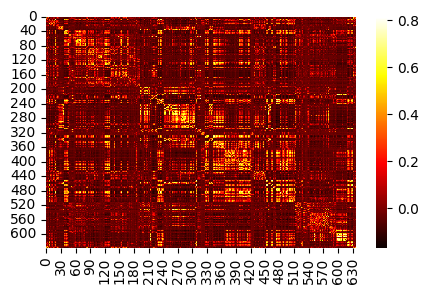

In [13]:
#Pearson
plt.figure(figsize=(5, 3))
sns.heatmap(corr_df_coact, cmap='hot')

<Axes: >

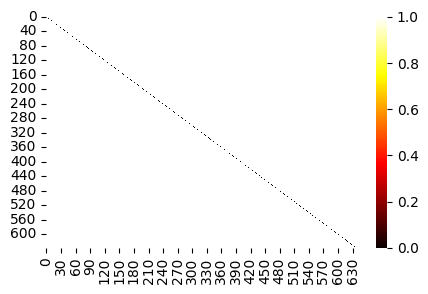

In [14]:
#Coherencia
plt.figure(figsize=(5, 3))
sns.heatmap(coh_df_coact, cmap='hot')

<Axes: >

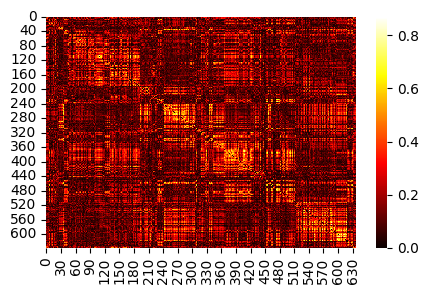

In [15]:
#Plv
plt.figure(figsize=(5, 3))
sns.heatmap(plv_df_coact, cmap='hot')

Distribución de datos

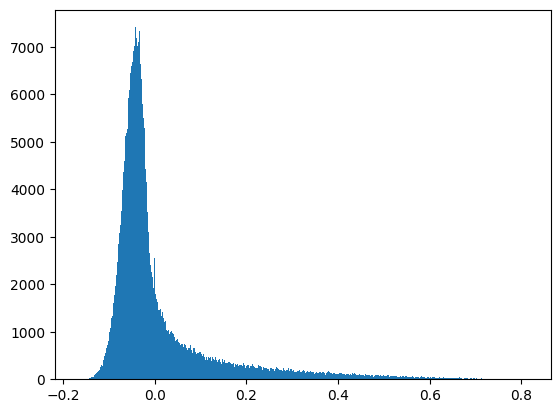

In [16]:
#Pearson
corr_df_coact_plano = corr_df_coact.values.flatten().tolist()
plt.hist(corr_df_coact_plano, bins=638)
plt.show()

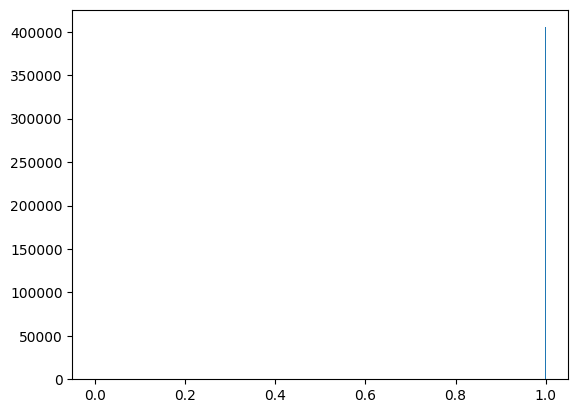

In [17]:
#Coherencia
coh_df_coact_plano = coh_df_coact.values.flatten().tolist()
plt.hist(coh_df_coact_plano, bins=638)
plt.show()

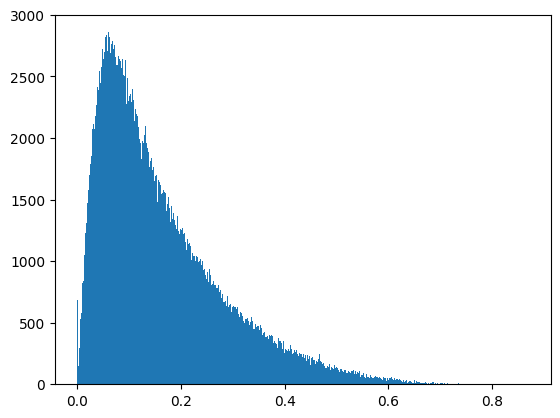

In [18]:
#PLV
plv_df_coact_plano = plv_df_coact.values.flatten().tolist()
plt.hist(plv_df_coact_plano, bins=638)
plt.show()

percentiles 0.25, 0.5 y 0.75 de la matriz de conectividad

In [19]:
#Pearson
percentil_25_pearson = np.percentile(corr_df_coact_plano, 25)
percentil_50_pearson = np.percentile(corr_df_coact_plano, 50)
percentil_75_pearson = np.percentile(corr_df_coact_plano, 75)
print ('Percentil 25=',percentil_25_pearson,'Percentil 50=',percentil_50_pearson,'Percentil 25=',percentil_75_pearson)

Percentil 25= -0.0546142517366701 Percentil 50= -0.031995227697846546 Percentil 25= 0.020704281028380664


In [20]:
#Coherencia
percentil_25_coh = np.percentile(coh_df_coact_plano, 25)
percentil_50_coh = np.percentile(coh_df_coact_plano, 50)
percentil_75_coh = np.percentile(coh_df_coact_plano, 75)
print ('Percentil 25=',percentil_25_coh,'Percentil 50=',percentil_50_coh,'Percentil 25=',percentil_75_coh)

Percentil 25= nan Percentil 50= nan Percentil 25= nan


In [21]:
#PLV
percentil_25_plv = np.percentile(plv_df_coact_plano, 25)
percentil_50_plv = np.percentile(plv_df_coact_plano, 50)
percentil_75_plv = np.percentile(plv_df_coact_plano, 75)
print ('Percentil 25=',percentil_25_plv,'Percentil 50=',percentil_50_plv,'Percentil 25=',percentil_75_plv)

Percentil 25= 0.07070025366660039 Percentil 50= 0.1298171340101397 Percentil 25= 0.22480429664257368


Grafos 2D filtrados por percentiles

In [ ]:
#pearson 25
pearson_filtro_25= pd.DataFrame(np.where(corr_df_coact > percentil_25_pearson, corr_df_coact,0),
                                index=corr_df_coact.index, columns= corr_df_coact.columns)
G_pearson_25 = nx.from_pandas_adjacency(pearson_filtro_25, create_using=nx.DiGraph)
pos = nx.spring_layout(G_pearson_25)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_pearson_25, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
#pearson 50
pearson_filtro_50= pd.DataFrame(np.where(corr_df_coact > percentil_50_pearson, corr_df_coact,0),
                                index=corr_df_coact.index, columns= corr_df_coact.columns)
G_pearson_50 = nx.from_pandas_adjacency(pearson_filtro_50, create_using=nx.DiGraph)
pos = nx.spring_layout(G_pearson_50)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_pearson_50, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
#pearson 75
pearson_filtro_75= pd.DataFrame(np.where(corr_df_coact > percentil_75_pearson, corr_df_coact,0),
                                index=corr_df_coact.index, columns= corr_df_coact.columns)
G_pearson_75 = nx.from_pandas_adjacency(pearson_filtro_75, create_using=nx.DiGraph)
pos = nx.spring_layout(G_pearson_75)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_pearson_75, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
# coh 25
coh_filtro_25= pd.DataFrame(np.where(coh_df_coact > percentil_25_coh, coh_df_coact,0),
                                index=coh_df_coact.index, columns= coh_df_coact.columns)
G_coh_25 = nx.from_pandas_adjacency(coh_filtro_25, create_using=nx.DiGraph)
pos = nx.spring_layout(G_coh_25)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_coh_25, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
# coh 50
coh_filtro_50= pd.DataFrame(np.where(coh_df_coact > percentil_50_coh, coh_df_coact,0),
                                index=coh_df_coact.index, columns= coh_df_coact.columns)
G_coh_50 = nx.from_pandas_adjacency(coh_filtro_50, create_using=nx.DiGraph)
pos = nx.spring_layout(G_coh_50)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_coh_50, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
# coh 75
coh_filtro_75= pd.DataFrame(np.where(coh_df_coact > percentil_75_coh, coh_df_coact,0),
                                index=coh_df_coact.index, columns= coh_df_coact.columns)
G_coh_75 = nx.from_pandas_adjacency(coh_filtro_75, create_using=nx.DiGraph)
pos = nx.spring_layout(G_coh_75)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_coh_75, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
# plv 25
plv_filtro_25= pd.DataFrame(np.where(plv_df_coact > percentil_25_plv, plv_df_coact,0),
                                index=plv_df_coact.index, columns= plv_df_coact.columns)
G_plv_25 = nx.from_pandas_adjacency(plv_filtro_25, create_using=nx.DiGraph)
pos = nx.spring_layout(G_plv_25)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_plv_25, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
# plv 50
plv_filtro_50= pd.DataFrame(np.where(plv_df_coact > percentil_50_plv, plv_df_coact,0),
                                index=plv_df_coact.index, columns= plv_df_coact.columns)
G_plv_50 = nx.from_pandas_adjacency(plv_filtro_50, create_using=nx.DiGraph)
pos = nx.spring_layout(G_plv_50)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_plv_50, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [ ]:
# plv 75
plv_filtro_75= pd.DataFrame(np.where(plv_df_coact > percentil_75_plv, plv_df_coact,0),
                                index=plv_df_coact.index, columns= plv_df_coact.columns)
G_plv_75 = nx.from_pandas_adjacency(plv_filtro_75, create_using=nx.DiGraph)
pos = nx.spring_layout(G_plv_75)
plt.figure(figsize=(5,5))
nx.draw_networkx(G_plv_75, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

Grafo 3d

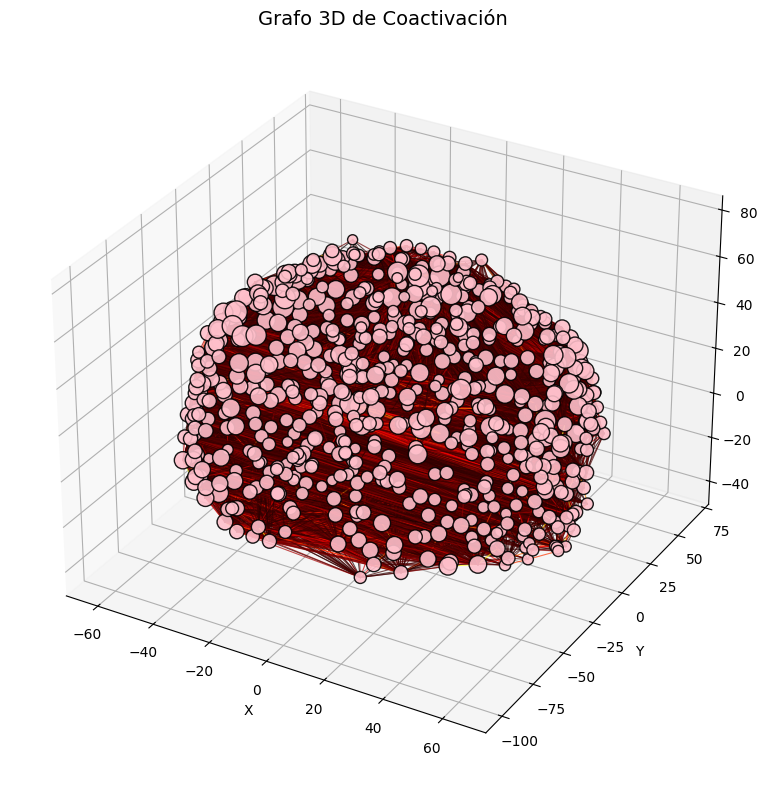

In [31]:
matriz = coactivation_dict['Coactivation_matrix']
coords = coactivation_dict['Coord']

# Crear grafo a partir de la matriz de coactivación
G = nx.from_numpy_array(matriz)

# Calcular el grado (suma de pesos por nodo)
grado = dict(G.degree(weight='weight'))

# Crear figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalizar tamaño de nodos según grado
grados = np.array(list(grado.values()))
tamaño_nodos = 200 * (grados - grados.min()) / (grados.max() - grados.min() + 1e-6) + 50

# Extraer posiciones de los nodos (Coord tiene forma Nx3)
pos = {i: coords[i] for i in range(len(coords))}

# Dibujar aristas con color según peso
edges = np.array([[u, v, d['weight']] for u, v, d in G.edges(data=True)])
norm = plt.Normalize(edges[:, 2].min(), edges[:, 2].max())
colors = plt.cm.hot(norm(edges[:, 2]))

for i, (u, v, w) in enumerate(edges):
    x = [pos[u][0], pos[v][0]]
    y = [pos[u][1], pos[v][1]]
    z = [pos[u][2], pos[v][2]]
    ax.plot(x, y, z, color=colors[i], alpha=0.7, linewidth=0.8)

# Dibujar nodos
ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2],
           s=tamaño_nodos, c='pink', edgecolors='k', alpha=0.9)

# Mostrar
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Grafo 3D de Coactivación', fontsize=14)
plt.tight_layout()
plt.show()

# chb01.edf

In [9]:
# Archivo chb01_01.edf
# ====== CONFIGURACIÓN ======
edf_path = r"C:\Users\Luz María\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\EEG_practica\"
sfreq_target = 256            # Frecuencia de muestreo a la que normalizamos (Hz)
# ====== CARGA Y PREPROCESAMIENTO ======
raw = mne.io.read_raw_edf(edf_path, preload=True)
raw.resample(sfreq_target)
raw.filter(1., 45., fir_design='firwin')
data = raw.get_data()
ch_names = raw.info['ch_names']
n_channels = len(ch_names)

Extracting EDF parameters from C:\Users\Luz María\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Luz María\AppData\Local\Temp\ipykernel_7176\1210037330.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)



In [15]:
# ====== MATRIZ DE PHASE LOCKING VALUE (PLV) ======
analytic_signal = hilbert(data)
phase_data = np.angle(analytic_signal)

plv_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        phase_diff = phase_data[i] - phase_data[j]
        plv_matrix[i, j] = np.abs(np.sum(np.exp(1j * phase_diff)) / phase_diff.size)

plv_df = pd.DataFrame(plv_matrix, index=ch_names, columns=ch_names)
np.fill_diagonal(plv_df.values, 0)

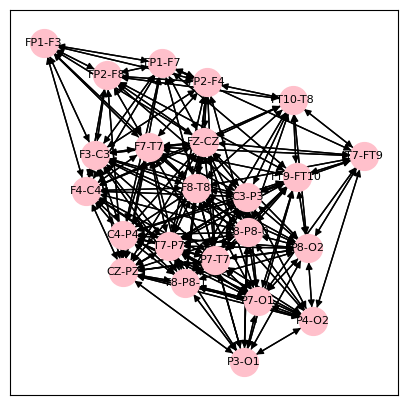

In [24]:
# Grafo 2D
grafo = nx.from_pandas_adjacency(plv_df>0.1 , create_using=nx.DiGraph) ## umbral para eliminar las conexiones débiles
pos = nx.spring_layout(grafo)
plt.figure(figsize=(5,5))
nx.draw_networkx(grafo, pos, with_labels=True, 
                 node_color='pink', arrows=True, 
                 node_size=400, font_size=8)
plt.show()

In [74]:
# Calculo del coeficiente de mundo pequeño
G = grafo.to_undirected() # Hay que convertir el grafo a no direccionado para los cálculos
# La fórmula del coeficienre es sigma = (C / C_rand) / (L / L_rand), entonces primero debemos calcular el coeficiente de clustering 
# y la longitud promedio de las rutas más cortas y se comparan las mismas mediciones con una red aleatoria
## coeficiente de clustering medio (C)
C = nx.average_clustering(G, weight='weight')
## longitud promedio del camino más corto (L)
L = nx.average_shortest_path_length(G, weight='weight')
# --- Crear red aleatoria equivalente ---
num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()
p = (2 * num_aristas) / (num_nodos * (num_nodos - 1))  # densidad equivalente
G_rand = nx.gnp_random_graph(num_nodos, p)
# clustering y longitud de la red aleatoria
C_rand = nx.average_clustering(G_rand)
L_rand = nx.average_shortest_path_length(G_rand)
# COEFICIENTE DE MUNDO PEQUEÑO
sigma = (C / C_rand) / (L / L_rand)
print(f"C = {C:.3f}, L = {L:.3f}")
print(f"C_rand = {C_rand:.3f}, L_rand = {L_rand:.3f}")
print(f"Coeficiente de mundo pequeño (σ): {sigma:.3f}")

C = 0.747, L = 1.328
C_rand = 0.649, L_rand = 1.344
Coeficiente de mundo pequeño (σ): 1.163


In [75]:
# Calculo de comunidades del grafo
from networkx.algorithms.community import greedy_modularity_communities, modularity
communities = greedy_modularity_communities(G)
mod = modularity(G, communities)
print ('Communities=',communities,'Modularidad=', mod)

Communities= [frozenset({'T8-P8-0', 'P3-O1', 'P4-O2', 'T7-FT9', 'FT10-T8', 'C3-P3', 'C4-P4', 'T8-P8-1', 'P7-O1', 'P7-T7', 'P8-O2', 'T7-P7', 'FT9-FT10'}), frozenset({'CZ-PZ', 'FP2-F8', 'F3-C3', 'FP2-F4', 'F7-T7', 'F8-T8', 'F4-C4', 'FP1-F3', 'FZ-CZ', 'FP1-F7'})] Modularidad= 0.10179930795847747


In [76]:
# Cálculo de hubs
degree_centrality = nx.degree_centrality(G) 
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
# Mostrar los 5 hubs principales
print("Principales 5 hubs por grado:")
for nodo, valor in sorted_degree[:5]:
    print(nodo, valor)

Principales 5 hubs por grado:
F8-T8 0.9090909090909092
C3-P3 0.8636363636363636
FZ-CZ 0.8636363636363636
T8-P8-0 0.8181818181818182
T8-P8-1 0.8181818181818182


In [77]:
# Calculo de eficiencia global
eficiencia_global = nx.global_efficiency(G)
# Calculo de eficiencia local
eficiencia_local = nx.local_efficiency(G)
print ('Eficiencia global=',eficiencia_global, 'Eficiencia local=', eficiencia_local)

Eficiencia global= 0.8359683794466403 Eficiencia local= 0.8731595471129728


In [78]:
# Cálculo del grado por nodo (ordendos de mayor a menor)
G_weighted = nx.from_pandas_adjacency(plv_df)
strength = dict(G_weighted.degree(weight='weight'))
sorted_strength = sorted(strength.items(), key=lambda x: x[1], reverse=True)
for nodo, valor in sorted_strength:
    print(nodo, round(valor,3))

grado_total = dict(grafo.degree(weight='weight'))
print ('grado total:',grado_total)

C3-P3 5.563
C4-P4 5.115
T8-P8-0 5.057
T8-P8-1 5.057
T7-P7 4.922
P7-T7 4.922
CZ-PZ 4.831
F3-C3 4.664
FZ-CZ 4.615
F4-C4 4.578
F8-T8 4.08
F7-T7 4.037
P7-O1 3.853
P4-O2 3.832
P8-O2 3.684
FP1-F7 3.424
FT9-FT10 3.379
FP2-F4 3.353
FP2-F8 3.352
P3-O1 3.322
FP1-F3 3.162
T7-FT9 2.744
FT10-T8 2.7
grado total: {'FP1-F7': 22, 'F7-T7': 32, 'T7-P7': 34, 'P7-O1': 30, 'FP1-F3': 16, 'F3-C3': 32, 'C3-P3': 38, 'P3-O1': 22, 'FP2-F4': 24, 'F4-C4': 32, 'C4-P4': 32, 'P4-O2': 24, 'FP2-F8': 22, 'F8-T8': 40, 'T8-P8-0': 36, 'P8-O2': 32, 'FZ-CZ': 38, 'CZ-PZ': 34, 'P7-T7': 34, 'T7-FT9': 20, 'FT9-FT10': 28, 'FT10-T8': 22, 'T8-P8-1': 36}


In [79]:
data

{'weight': 0.1187957858644116}

In [80]:
ch_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

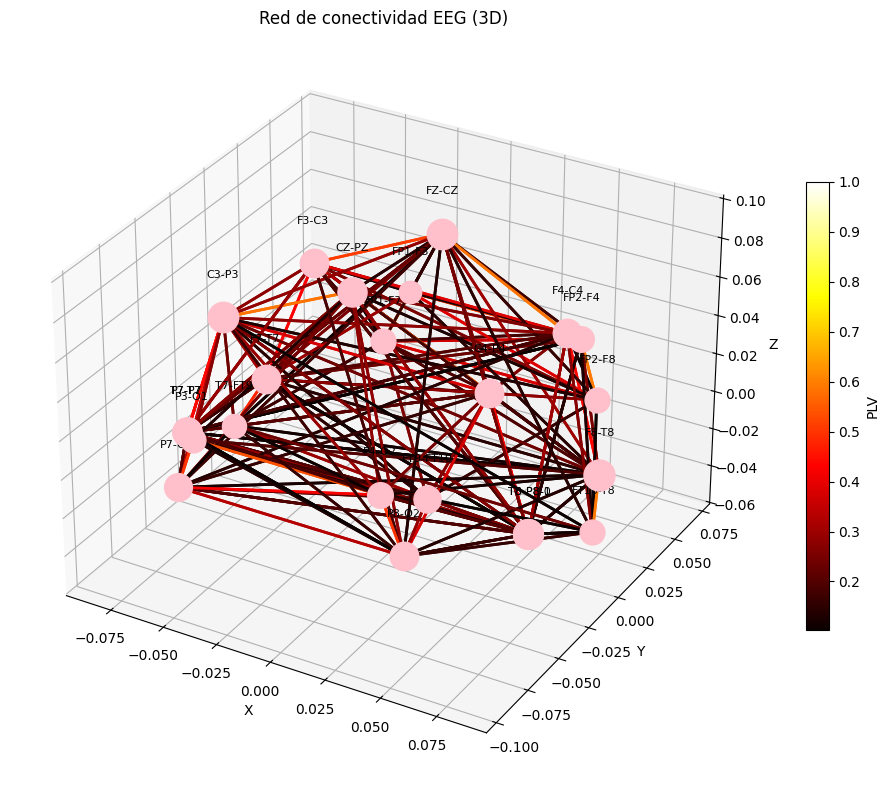

In [59]:
# grafo 3d con tamaño de nodos proporcional a su grado y color de las aristas relacionado al valor de la matriz de conectividad usando map-color Hot
# Preparar coordenadas 3D
# ===========================
montage = mne.channels.make_standard_montage('standard_1020')
# normalizar nombres del montage a mayúsculas
pos = {k.upper(): v for k, v in montage.get_positions()['ch_pos'].items()}

pos3D = {}
for canal in ch_names:
    partes = canal.split('-')
    elec1, elec2 = partes[0], partes[1]  # solo los dos primeros
    if elec1 in pos and elec2 in pos:
        x = (pos[elec1][0] + pos[elec2][0]) / 2
        y = (pos[elec1][1] + pos[elec2][1]) / 2
        z = (pos[elec1][2] + pos[elec2][2]) / 2
        pos3D[canal] = (x, y, z)
    else:
        print(f"Electrodo no encontrado: {elec1} o {elec2}")

# ===========================
# Grafo ponderado con PLV
# ===========================
# Usar valores reales de PLV para pesos
G = nx.from_pandas_adjacency(plv_df, create_using=nx.DiGraph)
# Filtrar aristas débiles
G = nx.DiGraph([(i,j,d) for i,j,d in G.edges(data=True) if d['weight']>0.1])

# ===========================
# Escalar nodos según grado
# ===========================
degree_dict = dict(G.degree())
node_sizes = [100 + 400*degree_dict.get(n,0)/max(degree_dict.values()) for n in G.nodes()]

# ===========================
# Configurar colormap para aristas
# ===========================
weights = [d['weight'] for _,_,d in G.edges(data=True)]
if weights:
    norm = plt.Normalize(min(weights), max(weights))
    cmap = colormaps['hot']  # moderno, reemplaza get_cmap

# ===========================
# Grafo 3D
# ===========================
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar nodos
for canal, (x, y, z) in pos3D.items():
    size = 100 + 400*degree_dict.get(canal,0)/max(degree_dict.values())
    ax.scatter(x, y, z, s=size, color='pink')
    ax.text(x, y, z+0.02, canal, fontsize=8, ha='center')

# Dibujar aristas coloreadas según PLV
for i, j, data in G.edges(data=True):
    if i in pos3D and j in pos3D:
        x = [pos3D[i][0], pos3D[j][0]]
        y = [pos3D[i][1], pos3D[j][1]]
        z = [pos3D[i][2], pos3D[j][2]]
        ax.plot(x, y, z, color=cmap(norm(data['weight'])), linewidth=2)

# Colorbar para PLV
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6)
cbar.set_label('PLV')

# Ejes y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Red de conectividad EEG (3D)')

plt.tight_layout()
plt.show()